<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Expected_Cumulative_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Cumulative Distribution Functions](https://www.youtube.com/watch?v=4QeL1ma_XJ0)

In [1]:
### Code Block 1 
# You will get a green check mark but see nothing as output. 

#### Edit here to load different data
datasource=c("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/WID_Data_2021-07-21.csv")
full_data = read.csv(url(datasource))

mydata = full_data$p99p100
#### 

mydata = subset(mydata, !is.na(mydata))

m = mean(mydata)
s = sd(mydata)
z = 1

#### Edit here to pick an observation at random or 
#### choose one intentionally. 
obs = sample(mydata,1)
obs = m+z*s
#### 

#### Edit here to change the number
#### of buckets in the histogram 
hist.buckets = 20
####


if (obs > median(mydata)) { 
  flip = 1  } else {
  flip = 0  }

16.82243% of the data are at or above the chosen observation, 0.196.
16.82243% of the data are at or below the observation, 0.121.


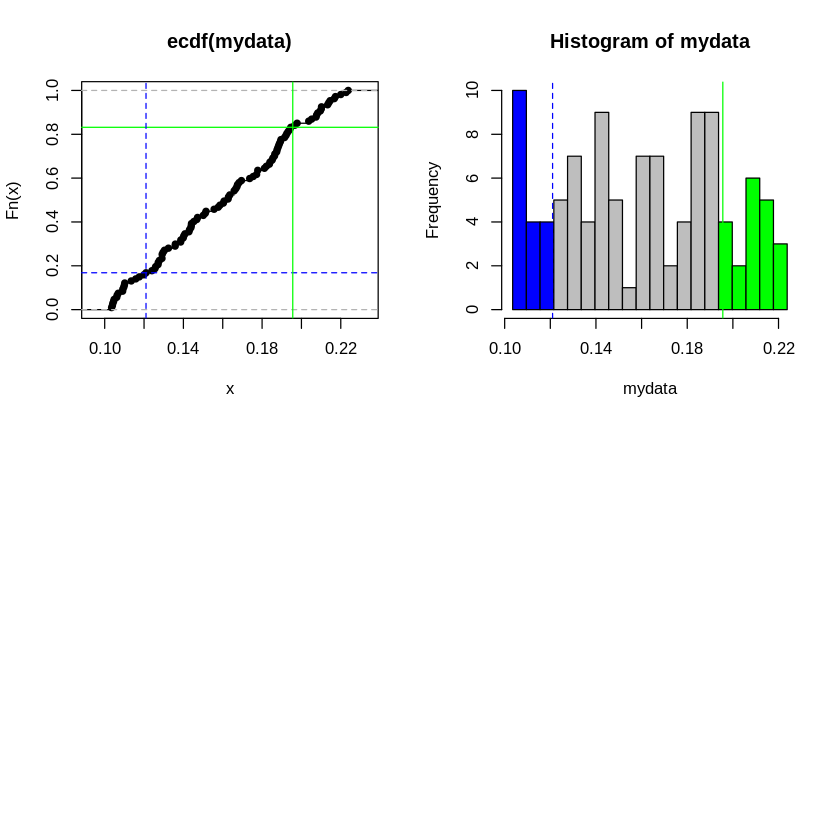

In [35]:
### Code Block 2 
# Requires obs and mydata to be previously defined. 

mydata = subset(mydata, !is.na(mydata))

if (obs > median(mydata)) { 
  flip = 1  } else {
  flip = 0  }

#### Everything here is automated assuming 
#### the previous code block has been run. 

mydata.cdf = ecdf(mydata) 
lb= min(mydata.cdf(obs), 1-mydata.cdf(obs))
size = length(mydata)
mydata.sort = sort(mydata)
obs.sym = mydata.sort[(1-mydata.cdf(obs))*size]
mydata.range=max(mydata)-min(mydata)
ub = mydata.cdf(obs.sym)

hist.bds = mydata.range/hist.buckets

par(mfrow=c(2,2))

plot(mydata.cdf)
abline(h=mydata.cdf(obs), col="green")
abline(h=1-mydata.cdf(obs), lty=2, col="blue")
abline(v=obs, col="green")
abline(v=obs.sym, col="blue", lty=2)
 
if(flip == 1){
  cols = c("blue", "grey", "green")} else {
  cols = c("green", "grey", "blue")}


tabs = seq(min(mydata),max(mydata),hist.bds) ## tabs might not be in the dataset
hist.size = length(tabs)
hist.left = max(which(tabs <= mydata.sort[lb*size]),0)
hist.right =  hist.size - max(which(tabs < mydata.sort[(1-lb)*size]),0)
hist.mid = max(hist.size - hist.left - hist.right,1)-1
col = rep(c(cols),c(hist.left, hist.mid , hist.right))
hist(mydata, breaks=tabs, col=col)
abline(v=obs, col="green")
abline(v=obs.sym, col="blue", lty=2)



cat(sep="",lb*100, "% of the data are at or ", 
    if(flip == 1) "above" else "below", 
    " the chosen observation, ", round(obs,3),".\n")
cat(sep="",if(flip == 1) ub*100 else (1-ub)*100, "% of the data are at or ", 
    if(flip == 1) "below" else "above", 
    " the observation, ", round(obs.sym,3),".\n")

In [32]:
### Code Block 3 
# You will get a green check mark but see nothing as output. 
# Essentially the same as code block 1. 

#### Edit here to load different data
datasource=c("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/WID_Data_2021-07-21.csv")
full_data = read.csv(url(datasource))

mydata = full_data$p99p100
#### 

mydata = subset(mydata, !is.na(mydata))

m = mean(mydata) 
s = sd(mydata)
z = 2

left =  m - z*s 
right = m + z*s 


#### Edit here to change the number
#### of buckets in the histogram 
hist.buckets = 20
####


if (left > median(mydata)) { 
  flip = 1  } else {
  flip = 0  }

100% of the data are between 0.09 and 0.231.


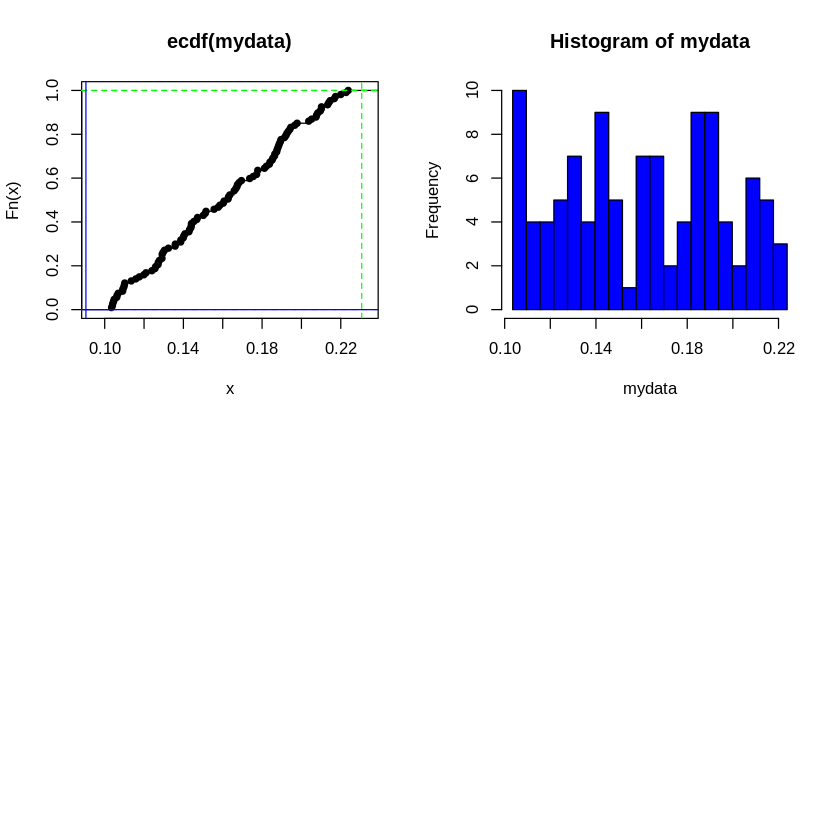

In [33]:
### Code Block 4
# This block will generate two graphs. 
#### Everything here is automated assuming 
#### the code block 3 has been run. 

mydata.cdf = ecdf(mydata) 
lb= mydata.cdf(left)
size = length(mydata)
mydata.sort = sort(mydata)
mydata.range=max(mydata)-min(mydata)
ub = mydata.cdf(right)

hist.bds = mydata.range/hist.buckets

par(mfrow=c(2,2))

plot(mydata.cdf)
abline(h=lb, col="blue")
abline(h=ub, lty=2, col="green")
abline(v=left, col="blue")
abline(v=right, col="green", lty=2)
 
if(flip == 1){
  cols = c("grey", "green", "grey")} else {
  cols = c("grey", "blue", "grey")}


tabs = seq(min(mydata),max(mydata),hist.bds) ## tabs might not be in the dataset
hist.size = length(tabs)
hist.left = max(which(tabs <= mydata.sort[lb*size]),0)
hist.right =  hist.size - max(which(tabs <= mydata.sort[ub*size]),0)
hist.mid = max(hist.size - hist.left - hist.right,1)-1
col = rep(c(cols),c(hist.left, hist.mid , hist.right))
hist(mydata, breaks=tabs, col=col)
abline(v=left, col="blue")
abline(v=right, col="green", lty=2)

cat(sep="",(ub - lb)*100, "% of the data are between ", round(left,3), " and ", round(right,3), ".\n")


In [ ]:
### Code Block 5 
# Download this file to your computer: https://healthdata.gov/api/views/anag-cw7u/rows.csv 
# It may take a while to download.
# Drag it into the working directory for Colab.
# When you click play on this code block, no output will be generated. 

# Make sure your file name matches this file name. If not, change this one. 
filename = c("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility 2022-02-24.csv")

HOSP <- read.csv(filename)
#### https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u

HOSP_backup = HOSP

In [ ]:
#### Code Block 6
# This code block cleans data. 
# Feel free to add your favorite zipcodes to the list. 
# Feel free to pick a different column. (There are 109 options.)

HOSP = HOSP_backup       # If needed, resets HOSP to the originally uploaded file. 
#HOSP$collection_week = as.Date(HOSP$collection_week)

#### These lines restricts HOSP to most recent saturday. 
#sat = max(HOSP$collection_week)
#HOSP = subset(HOSP, HOSP$collection_week==sat)
#cat("Restricting to", format(sat, format="%B %d, %Y"),"\n")


HOSP.neighbor = subset(HOSP,  zip == "52001" |
                              zip == "52068" | 
                              zip == "61025" | 
                              zip == "61036" | 
                              zip == "53818")



### Browse the 109 columns here: https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u 
#mydata = HOSP.neighbor$previous_week_patients_covid_vaccinated_doses_all_7_day   # There are 109 columns in this data set. 
#mydata = HOSP.neighbor$previous_week_patients_covid_vaccinated_doses_one_7_day   # There are 109 columns in this data set. 
mydata = HOSP.neighbor$total_beds_7_day_avg
#mydata = HOSP.neighbor$total_personnel_covid_vaccinated_doses_none_7_day

#mydata = HOSP.neighbor$previous_day_admission_pediatric_covid_confirmed_7_day_sum


mydata = subset(mydata, mydata > -1)
mydata = subset(mydata, !is.na(mydata))
# head(mydata,2)      # If running the next block generates an error message, 
                      # uncomment head(mydata,2) to see what you even have in your data set. 

0% of the data is at or below the chosen observation, 91.
0% of the data is at or above the observation, 123.


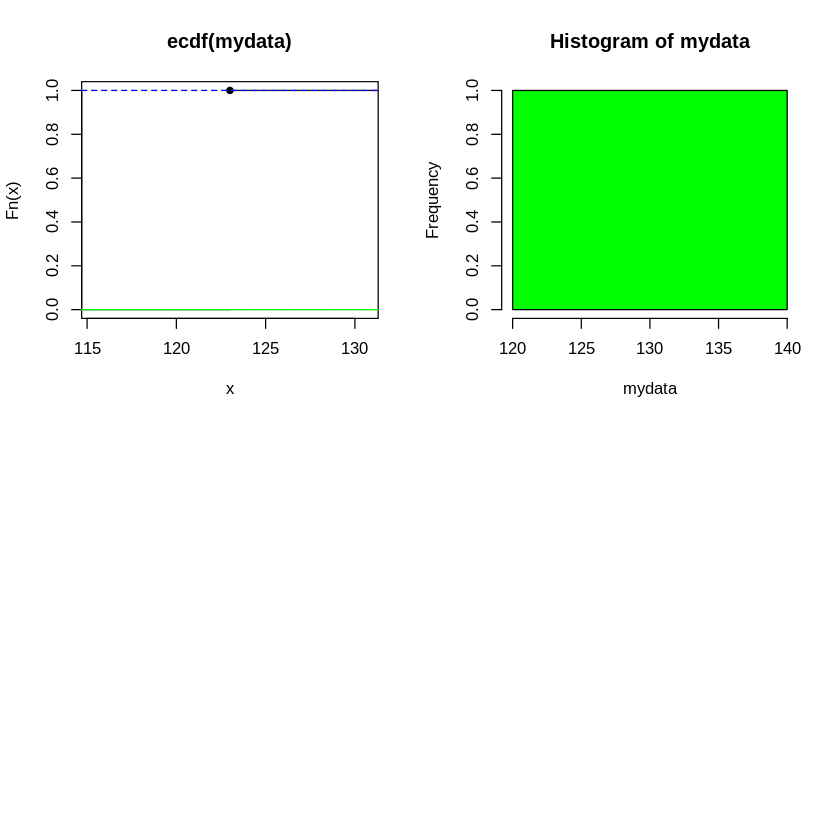

In [ ]:
### Code Block 7 = Code Block 2
# Generates the two distribution graphs

mydata = subset(mydata, !is.na(mydata))

#### Edit here to pick an observation at random or 
#### choose one intentionally. 
obs = sample(mydata,1)
#obs = 20
#### 

#### Edit here to change the number
#### of buckets in the histogram 
hist.buckets = 20
####


if (obs > median(mydata)) { 
  flip = 1  } else {
  flip = 0  }

#### Everything here is automated assuming 
#### the previous code block has been run. 

mydata.cdf = ecdf(mydata) 
lb= min(mydata.cdf(obs), 1-mydata.cdf(obs))
size = length(mydata)
mydata.sort = sort(mydata)
obs.sym = mydata.sort[(1-mydata.cdf(obs))*size]
mydata.range=max(mydata)-min(mydata)
ub = mydata.cdf(obs.sym)

hist.bds = mydata.range/hist.buckets

par(mfrow=c(2,2))

plot(mydata.cdf)
abline(h=mydata.cdf(obs), col="green")
abline(h=1-mydata.cdf(obs), lty=2, col="blue")
abline(v=obs, col="green")
abline(v=obs.sym, col="blue", lty=2)
 
if(flip == 1){
  cols = c("blue", "grey", "green")} else {
  cols = c("green", "grey", "blue")}


tabs = seq(min(mydata),max(mydata),hist.bds) ## tabs might not be in the dataset
hist.size = length(tabs)
hist.left = max(which(tabs <= mydata.sort[lb*size]),0)
hist.right =  hist.size - max(which(tabs < mydata.sort[(1-lb)*size]),0)
hist.mid = max(hist.size - hist.left - hist.right,1)-1
col = rep(c(cols),c(hist.left, hist.mid , hist.right))
hist(mydata, breaks=tabs, col=col)
abline(v=obs, col="green")
abline(v=obs.sym, col="blue", lty=2)

cat(sep="",lb*100, "% of the data is at or ", 
    if(flip == 1) "above" else "below", 
    " the chosen observation, ", round(obs,3),".\n")
cat(sep="",if(flip == 1) ub*100 else (1-ub)*100, "% of the data is at or ", 
    if(flip == 1) "below" else "above", 
    " the observation, ", round(obs.sym,3),".\n")